In [633]:
"""
This is a jupyter notebook to explore RESOLVE and ECO. My mini-project will be to compare the u-r color vs. stellar
mass plot for RESOLVE and ECO, knowing that the u-r color is defined differently in the two surveys (the ECO glossary says
"modelu_rcorr" is corrected for internal extinction by the host galaxy, whereas the RESOLVE glossary says "modelu_r"  
has only "foreground corrections" meaning corrections for extinction by dust in our own Galaxy).
Author: Sheila Kannappan
Created: August 2016
"""

# standard imports and naming conventions; uncomment as needed
import numpy as np              # basic numerical analysis
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg #image plot
import scipy.stats as stats     # statistical functions
from astroML.plotting import scatter_contour

%matplotlib inline

In [652]:
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

In [635]:
data = np.genfromtxt("ECO_dr1_subsetmini.csv", delimiter=",", dtype=None, names=True) # better than np.loadtxt if have column names

In [636]:
data.dtype.names

('NAME', 'CZ', 'LOGMSTAR', 'LOGMH', 'RADEG', 'DEDEG', 'GRPCZ', 'CCR', 'CCB')

In [637]:
logmstar = data['LOGMSTAR'] #Log Stellar Mass
logmh = data['LOGMH'] #Log Halo Mass
grpcz = data['GRPCZ'] #Velocity of Group Center (km/s)
cz = data['CZ'] #Local group corrected velocity (km/s)
z = data['CCR']
raDeg = data['RADEG'] #Right ascension in degrees
deDeg = data['DEDEG'] #Declination in Degrees


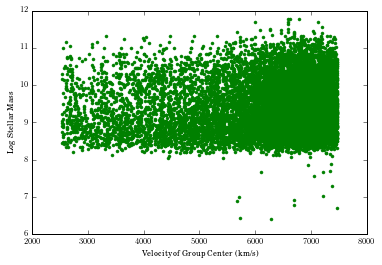

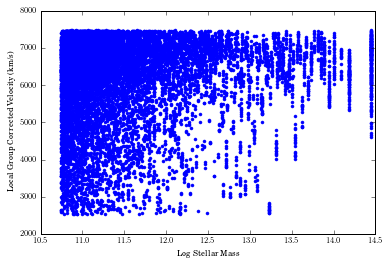

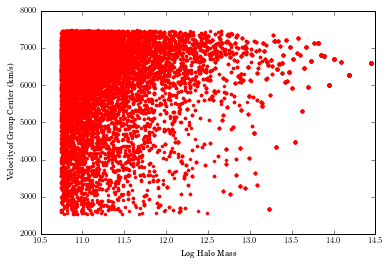

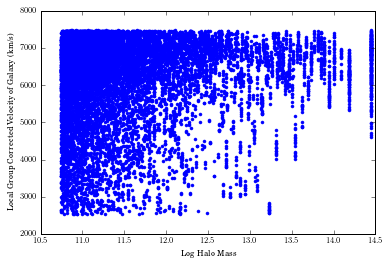

In [638]:
fig, ax = plt.subplots()

ax = plt.axes()
ax.plot(grpcz, logmstar, 'g.')
ax.set_ylabel("Log Stellar Mass")
ax.set_xlabel("Velocity of Group Center (km/s)")

fig, ax = plt.subplots()
ax = plt.axes()
ax.plot(logmh, cz, 'b.')
ax.set_xlabel("Log Stellar Mass")
ax.set_ylabel("Local Group Corrected Velocity (km/s)")

fig, ax = plt.subplots()
ax = plt.axes()
ax.plot(logmh,grpcz, 'r.')
ax.set_xlabel("Log Halo Mass")
ax.set_ylabel("Velocity of Group Center (km/s)")

fig, ax = plt.subplots()
ax = plt.axes()
ax.plot(logmh,cz, 'b.')
ax.set_xlabel("Log Halo Mass")
ax.set_ylabel("Local Group Corrected Velocity of Galaxy (km/s)")

(-0.998, 49.844999999999999)

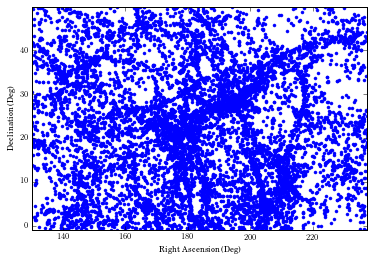

In [639]:
fig, ax = plt.subplots()
ax = plt.axes()
ax.plot(raDeg,deDeg, 'b.')
ax.set_xlabel("Right Ascension (Deg)")
ax.set_ylabel("Declination (Deg)")
ax.set_xlim(np.min(raDeg),np.max(raDeg))
ax.set_ylim(np.min(deDeg),np.max(deDeg))

7470.0
2532.8


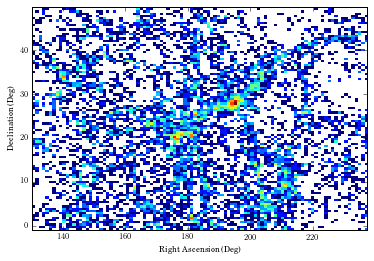

In [640]:
# Plot the results using the binned_statistic function
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d(raDeg, deDeg, cz, 'count', bins=100)
FeH_mean, xedges, yedges = binned_statistic_2d(raDeg, deDeg, cz, 'mean', bins=100)

# Define custom colormaps: Set pixels with no sources to white
#cmap = plt.cm.copper
#cmap.set_bad('w', 1.)
#cmap.set_bad(0, 1.)

#cmap_multicolor = plt.cm.jet
#cmap_multicolor.set_bad('w', 1.)


# Create figure and subplots
fig = plt.figure()
#fig.subplots_adjust()

#--------------------
# First axes:
ax = plt.subplot()
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest')
#plt.xlim(np.min(raDeg),np.max(raDeg))
#plt.ylim(np.min(deDeg, np.max(deDeg))
#plt.xlabel('Right Ascension')
#plt.ylabel('Declination$')
         
ax.set_xlabel("Right Ascension (Deg)")
ax.set_ylabel("Declination (Deg)")
ax.set_xlim(np.min(raDeg),np.max(raDeg))
ax.set_ylim(np.min(deDeg),np.max(deDeg))

#cb = plt.colorbar(ticks=[0, 1, 2, 3], pad=0.2, format=r'$10^{%i}$', orientation='horizontal')
#cb.set_label('Group Velocity')
#plt.clim(2500, 7500)

print(np.max(cz))
print(np.min(cz))

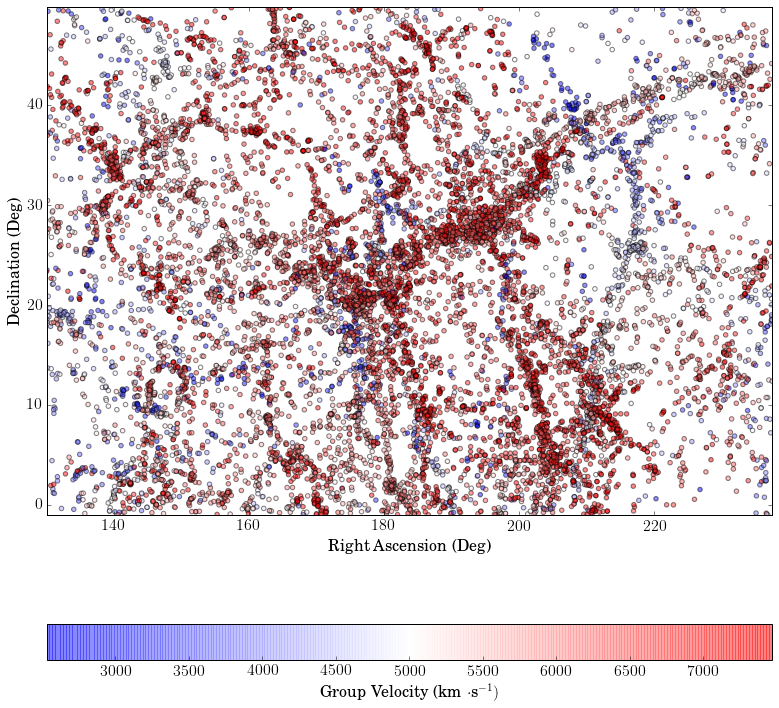

In [653]:
fig1, ax = plt.subplots(figsize=(13,13))
ax = plt.axes()


sc = ax.scatter(raDeg,deDeg,marker='o' ,c=cz,cmap = plt.cm.bwr, alpha = 0.5) #cmap = plt.cm.bwr_r will reverse the color scheme
ax.set_xlabel("Right Ascension (Deg)")
ax.set_ylabel("Declination (Deg)")
ax.set_xlim(np.min(raDeg),np.max(raDeg))
ax.set_ylim(np.min(deDeg),np.max(deDeg))

cb = plt.colorbar(sc,orientation='horizontal')
cb.set_label(r'Group Velocity (km $\cdot$s$^{-1})$')
#cb.vlim(2500, 7500)
plt.show(sc)

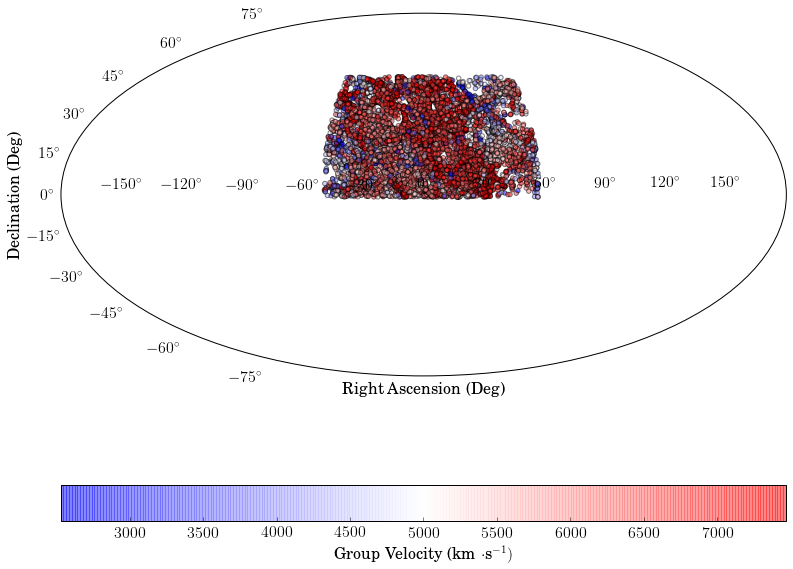

In [661]:
fig1, ax = plt.subplots(figsize=(13,13))
ax = plt.axes(projection ='mollweide')

rRad = (raDeg*np.pi/180) -np.pi
dRad = deDeg*np.pi/180

sc = ax.scatter(rRad,dRad,marker='o' ,c=cz,cmap = plt.cm.bwr, alpha = 0.5) #cmap = plt.cm.bwr_r will reverse the color scheme
ax.set_xlabel("Right Ascension (Deg)")
ax.set_ylabel("Declination (Deg)")
#ax.set_xlim(np.min(raDeg),np.max(raDeg))
#ax.set_ylim(np.min(deDeg),np.max(deDeg))

cb = plt.colorbar(sc,orientation='horizontal')
cb.set_label(r'Group Velocity (km $\cdot$s$^{-1})$')
#cb.vlim(2500, 7500)
plt.show(sc)